In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EMPEZAMOS CON EDA DE LAS ACCIONES DE APPLE

In [2]:
raw_precios_AAPL = pd.read_csv(('../Dataset/raw/AAPL_precios_acciones.csv'), sep = ',')
raw_precios_AAPL.head()
                      

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,24.320430755615234,24.789799848077692,23.87997951870223,24.7786766820896,212818400
3,2015-01-05,23.635284423828125,24.169164129068307,23.4484274604303,24.08908208842444,257142000
4,2015-01-06,23.637516021728516,23.897781878192376,23.274921764638442,23.699801693652454,263188400


In [3]:
# eliminar la primera fila
raw_precios_AAPL.drop(index=0, inplace=True)

In [4]:
# eliminar nan
raw_precios_AAPL.dropna(inplace=True)

In [5]:
# cambiar nombre de columnas, price por date
raw_precios_AAPL.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [6]:
# obtener info de los datos
raw_precios_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 2 to 2575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2574 non-null   object
 1   Close   2574 non-null   object
 2   High    2574 non-null   object
 3   Low     2574 non-null   object
 4   Open    2574 non-null   object
 5   Volume  2574 non-null   object
dtypes: object(6)
memory usage: 140.8+ KB


In [7]:
# cambiar tipo de datos y redondear a 2 decimales en las columnas que aplique

raw_precios_AAPL['Date'] = pd.to_datetime(raw_precios_AAPL['Date'])
raw_precios_AAPL['Close'] = pd.to_numeric(raw_precios_AAPL['Close'].round(2))
raw_precios_AAPL['High'] = pd.to_numeric(raw_precios_AAPL['High'].round(2))
raw_precios_AAPL['Low'] = pd.to_numeric(raw_precios_AAPL['Low'].round(2))
raw_precios_AAPL['Open'] = pd.to_numeric(raw_precios_AAPL['Open'].round(2))
raw_precios_AAPL['Volume'] = pd.to_numeric(raw_precios_AAPL['Volume'].round(2))

In [8]:
# verificar info de los datos para ver si hicieron efecto los cambios
raw_precios_AAPL.info()
raw_precios_AAPL.reset_index(drop=True, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 2 to 2575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2574 non-null   datetime64[ns]
 1   Close   2574 non-null   float64       
 2   High    2574 non-null   float64       
 3   Low     2574 non-null   float64       
 4   Open    2574 non-null   float64       
 5   Volume  2574 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 140.8 KB


In [9]:
# cambiar de orden las columnas para que dar un formato más limpio y ordenado
raw_precios_AAPL = raw_precios_AAPL[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [10]:
# verificar si hay valores nulos
raw_precios_AAPL.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
raw_precios_AAPL.duplicated(['Date']).sum()

np.int64(0)

In [12]:
raw_precios_AAPL

,Date,Open,High,Low,Close,Volume
0,2015-01-02,24.778677,24.789800,23.879980,24.320431,212818400
1,2015-01-05,24.089082,24.169164,23.448427,23.635284,257142000
2,2015-01-06,23.699802,23.897782,23.274922,23.637516,263188400
3,2015-01-07,23.846610,24.069060,23.735385,23.968958,160423600
4,2015-01-08,24.298183,24.947736,24.180283,24.889898,237458000
...,...,...,...,...,...,...
2569,2025-03-21,211.559998,218.839996,211.279999,218.270004,94127800
2570,2025-03-24,221.000000,221.479996,218.580002,220.729996,44299500
2571,2025-03-25,220.770004,224.100006,220.080002,223.750000,34493600
2572,2025-03-26,223.509995,225.020004,220.470001,221.529999,34532700


In [13]:
raw_precios_AAPL.describe()

,Date,Open,High,Low,Close,Volume
count,2574,2574.000000,2574.000000,2574.000000,2574.000000,2.574000e+03
mean,2020-02-11 23:11:19.720279808,97.198216,98.239848,96.223754,97.284540,1.156422e+08
min,2015-01-02 00:00:00,20.596722,20.978906,20.475435,20.674536,2.323470e+07
25%,2017-07-24 06:00:00,35.829304,36.023978,35.591215,35.830737,6.963792e+07
50%,2020-02-12 12:00:00,68.411218,69.446233,67.555614,68.790337,9.841010e+07
75%,2022-08-31 18:00:00,154.880092,157.213646,152.578035,155.051308,1.411344e+08
max,2025-03-27 00:00:00,257.906429,259.814335,257.347047,258.735504,6.488252e+08
std,NaN,68.009634,68.725053,67.347645,68.083339,6.833532e+07


# COMENTARIO:

Hasta aquí podemos observar que la tabla mayormente no tiene mucho por limpiar, no posee datos nulos y no tendría sentido aplicar una eliminación de datos duplicados ya que la información se la extrajo por día, sin embargo, se aplicó un .duplicated a 'Date' únicamente para confirmar.



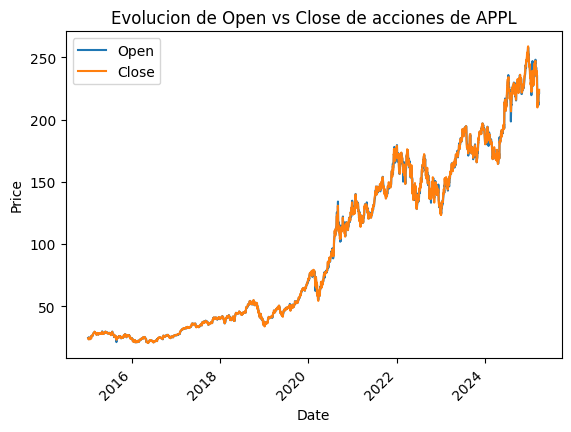

In [14]:
raw_precios_AAPL.plot(
    x='Date',
    y=['Open', 'Close'],
    kind='line',
    title='Evolucion de Open vs Close de acciones de APPL',
    xlabel='Date',
    ylabel='Price'
)
plt.xticks(rotation=45)
plt.show()


# COMENTARIO
En el gráfico se observa variaciones mínimas entre el precio open - close y aquí quiero explicar una parte importante.

Lo ideal sería que el precio con el cierra el día anterior, abra el siguiente día, sin embargo, esto no ocurre por algo que se llama Horas extendidas (extended hours).
Esto significa que al cierre del mercado que es las 16H00 hora EEUU, los inversionistas a través de sus brokers pueden colocar órdenes de compra o venta de acciones luego de esas horas y por efecto de la oferta y demanda, el precio fluctúa. Por este motivo difiere el precio al dia siguiente.

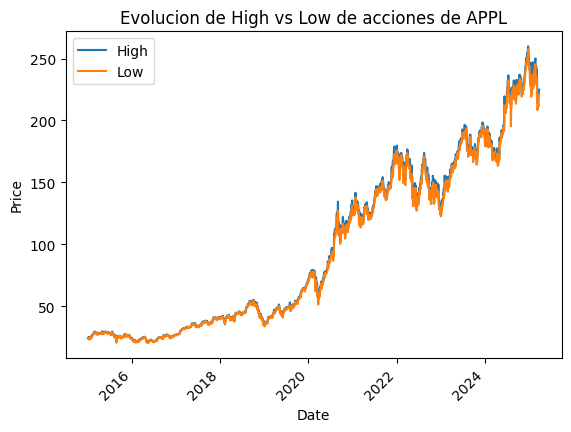

In [15]:
raw_precios_AAPL.plot(
    x='Date',
    y=['High', 'Low'],
    kind='line',
    title='Evolucion de High vs Low de acciones de APPL',
    xlabel='Date',
    ylabel='Price'
)
plt.xticks(rotation=45)
plt.show()

# COMENTARIO
Aquí se diferencia de forma más clara la evolución del precio de la acción, como el nombre de las columnas lo indica, se compara el precio más alto vs el más bajo. 

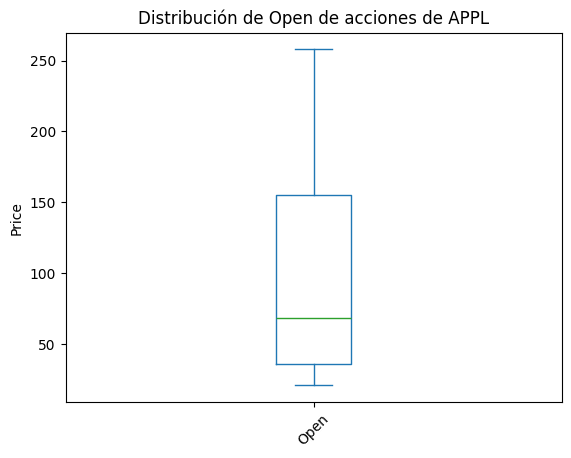

In [16]:
raw_precios_AAPL.plot(
    x='Date',
    y='Open',
    kind='box',
    title='Distribución de Open de acciones de APPL',
    ylabel='Price'
)

plt.xticks(rotation=45)
plt.show()

# COMENTARIO
Se observa un comportamiento normal del precio de la acción durante los años que se están considerando para este estudio.

In [17]:
# tomar el dataframe limpio y guardarlo como un nuevo csv
raw_precios_AAPL.to_csv(('../Dataset/curated/AAPL_precios_acciones_limpio.csv'))

# SE CARGA LA INFORMACIÓN DE .CSV OPENINSIDERS DE LAS ACCIONES DE AAPL

In [18]:
raw_insiders_AAPL = pd.read_csv(('../Dataset/raw/AAPL_transaccionesOPENINSIDER.csv'), sep = ',')
raw_insiders_AAPL

,X,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value,1d,1w,1m,6m
0,D,2004-04-21 19:07:40,2004-04-19,AAPL,Heinen Nancy R,SVP,S - Sale+OE,$28.00,"-200,000","1,315",-99%,"-$5,600,000",0.0,-3.0,-5.0,71.0
1,D,2004-04-21 19:08:35,2004-04-19,AAPL,Tamaddon Sina,SVP,S - Sale+OE,$28.08,"-678,400","6,452",-99%,"-$19,046,284",0.0,-3.0,-5.0,71.0
2,DM,2004-04-21 19:09:19,2004-04-19,AAPL,Rubinstein Jonathan,SVP,S - Sale+OE,$28.35,"-250,000","9,906",-96%,"-$7,087,500",0.0,-3.0,-5.0,71.0
3,D,2004-04-21 19:11:31,2004-04-19,AAPL,Cook Timothy D,EVP,S - Sale+OE,$27.99,"-84,000","4,722",-95%,"-$2,351,280",0.0,-3.0,-5.0,71.0
4,D,2004-04-21 19:12:19,2004-04-19,AAPL,Cook Timothy D,EVP,S - Sale+OE,$28.21,"-94,000","4,722",-95%,"-$2,651,880",0.0,-3.0,-5.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,NaN,2024-10-08 18:30:13,2024-10-04,AAPL,Maestri Luca,"SVP, CFO",S - Sale,$226.52,"-59,305","107,788",-35%,"-$13,433,769",NaN,NaN,NaN,NaN
600,NaN,2024-11-19 18:30:49,2024-11-18,AAPL,Kondo Chris,Principal Accounting Officer,S - Sale,$228.87,"-4,130","15,419",-21%,"-$945,233",NaN,NaN,NaN,NaN
601,M,2024-11-19 18:31:42,2024-11-15,AAPL,Levinson Arthur D,Dir,S - Sale,$227.32,"-200,000","4,215,576",-5%,"-$45,464,500",NaN,NaN,NaN,NaN
602,NaN,2024-12-18 18:30:20,2024-12-16,AAPL,Williams Jeffrey E,COO,S - Sale,$249.97,"-100,000","389,944",-20%,"-$24,997,395",NaN,NaN,NaN,NaN


In [19]:
raw_insiders_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             409 non-null    object 
 1   Filing Date   604 non-null    object 
 2   Trade Date    604 non-null    object 
 3   Ticker        604 non-null    object 
 4   Insider Name  604 non-null    object 
 5   Title         604 non-null    object 
 6   Trade Type    604 non-null    object 
 7   Price         604 non-null    object 
 8   Qty           604 non-null    object 
 9   Owned         604 non-null    object 
 10  ΔOwn          604 non-null    object 
 11  Value         604 non-null    object 
 12  1d            469 non-null    float64
 13  1w            467 non-null    float64
 14  1m            464 non-null    float64
 15  6m            440 non-null    float64
dtypes: float64(4), object(12)
memory usage: 75.6+ KB


In [20]:
raw_insiders_AAPL.isna().sum()

X               195
Filing Date       0
Trade Date        0
Ticker            0
Insider Name      0
Title             0
Trade Type        0
Price             0
Qty               0
Owned             0
ΔOwn              0
Value             0
1d              135
1w              137
1m              140
6m              164
dtype: int64

# COMENTARIO

Se encuentran valores nulos en 5 de 16 columnas, de momento no haré nada ya que más adelante estas columnas no representan un impacto significativo dentro del desarrollo del proyecto y tengo planeado eliminarlas.

In [21]:
# cambiar nombre de columnas para estandarizar
raw_insiders_AAPL.columns = ['x', 'filing_date', 'trade_date', 'ticker', 'insider_name', 'title', 'trade_type', 'price', 'quantity_of_shares', 'owned', 'delta_owned', 'value', '1d', '1w', '1m', '6m']

In [22]:
# cambiar tipo de datos de las columnas
raw_insiders_AAPL['filing_date'] = pd.to_datetime(raw_insiders_AAPL['filing_date'])
raw_insiders_AAPL['trade_date'] = pd.to_datetime(raw_insiders_AAPL['trade_date'])
raw_insiders_AAPL['delta_owned'] = raw_insiders_AAPL['delta_owned'].astype(str)
raw_insiders_AAPL['insider_name'] = raw_insiders_AAPL['insider_name'].astype(str)
raw_insiders_AAPL['title'] = raw_insiders_AAPL['title'].astype(str)
raw_insiders_AAPL['trade_type'] = raw_insiders_AAPL['trade_type'].astype(str)
raw_insiders_AAPL['price'] = pd.to_numeric(raw_insiders_AAPL['price'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')
raw_insiders_AAPL['quantity_of_shares'] = pd.to_numeric(raw_insiders_AAPL['quantity_of_shares'].astype(str).str.replace('[-,]', '', regex=True), errors='coerce').astype(int)
raw_insiders_AAPL['owned'] = pd.to_numeric(raw_insiders_AAPL['owned'].astype(str).str.replace(',', '', regex=True), errors='coerce')
raw_insiders_AAPL['value'] = pd.to_numeric(raw_insiders_AAPL['value'].astype(str).str.replace('[$,-]', '', regex=True), errors='coerce')


In [23]:
raw_insiders_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   x                   409 non-null    object        
 1   filing_date         604 non-null    datetime64[ns]
 2   trade_date          604 non-null    datetime64[ns]
 3   ticker              604 non-null    object        
 4   insider_name        604 non-null    object        
 5   title               604 non-null    object        
 6   trade_type          604 non-null    object        
 7   price               604 non-null    float64       
 8   quantity_of_shares  604 non-null    int64         
 9   owned               604 non-null    int64         
 10  delta_owned         604 non-null    object        
 11  value               604 non-null    int64         
 12  1d                  469 non-null    float64       
 13  1w                  467 non-null    float64       

In [24]:
raw_insiders_AAPL

,x,filing_date,trade_date,ticker,insider_name,title,trade_type,price,quantity_of_shares,owned,delta_owned,value,1d,1w,1m,6m
0,D,2004-04-21 19:07:40,2004-04-19,AAPL,Heinen Nancy R,SVP,S - Sale+OE,28.00,200000,1315,-99%,5600000,0.0,-3.0,-5.0,71.0
1,D,2004-04-21 19:08:35,2004-04-19,AAPL,Tamaddon Sina,SVP,S - Sale+OE,28.08,678400,6452,-99%,19046284,0.0,-3.0,-5.0,71.0
2,DM,2004-04-21 19:09:19,2004-04-19,AAPL,Rubinstein Jonathan,SVP,S - Sale+OE,28.35,250000,9906,-96%,7087500,0.0,-3.0,-5.0,71.0
3,D,2004-04-21 19:11:31,2004-04-19,AAPL,Cook Timothy D,EVP,S - Sale+OE,27.99,84000,4722,-95%,2351280,0.0,-3.0,-5.0,71.0
4,D,2004-04-21 19:12:19,2004-04-19,AAPL,Cook Timothy D,EVP,S - Sale+OE,28.21,94000,4722,-95%,2651880,0.0,-3.0,-5.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,NaN,2024-10-08 18:30:13,2024-10-04,AAPL,Maestri Luca,"SVP, CFO",S - Sale,226.52,59305,107788,-35%,13433769,NaN,NaN,NaN,NaN
600,NaN,2024-11-19 18:30:49,2024-11-18,AAPL,Kondo Chris,Principal Accounting Officer,S - Sale,228.87,4130,15419,-21%,945233,NaN,NaN,NaN,NaN
601,M,2024-11-19 18:31:42,2024-11-15,AAPL,Levinson Arthur D,Dir,S - Sale,227.32,200000,4215576,-5%,45464500,NaN,NaN,NaN,NaN
602,NaN,2024-12-18 18:30:20,2024-12-16,AAPL,Williams Jeffrey E,COO,S - Sale,249.97,100000,389944,-20%,24997395,NaN,NaN,NaN,NaN


In [25]:
# consultar los nombres de directivos a lo largo del tiempo y validar que no existan duplicados en los nombres por errores de typeo o de extracción de datos.
insider_name = raw_insiders_AAPL['insider_name'].unique()
insider_name


array(['Heinen Nancy R', 'Tamaddon Sina', 'Rubinstein Jonathan',
       'Cook Timothy D', 'Anderson Fred D', 'Schiller Philip W',
       'Tevanian Avadis', 'Serlet Bertrand', 'York Jerome B',
       'Johnson Ronald B', 'Levinson Arthur D', 'Oppenheimer Peter',
       'Fadell Anthony', 'Schmidt Eric E', 'Campbell William V',
       'Drexler Millard S', 'Ive Jonathan P', 'Forstall Scott J',
       'Mansfield Robert J', 'Rafael Betsy', 'Papermaster Mark D',
       'Sewell D Bruce', 'Williams Jeffrey E', 'Jung Andrea',
       'Iger Robert A', 'Riccio Daniel J.', 'Mansfield Robert L',
       'Cue Eduardo H', 'Maestri Luca', 'Federighi Craig',
       'Ahrendts Angela J', 'Wagner Susan', 'Srouji Johny', 'Kondo Chris',
       'Gore Albert Jr', "O'Brien Deirdre", 'Adams Katherine L.'],
      dtype=object)

In [26]:
pd.Series(insider_name).duplicated().sum()

np.int64(0)

# COMENTARIO
Con esta validación quería asegurarme que por ejemplo una persona no tenga registrado su nombre de diferente forma, por ejemplo "TIM COOK", "COOK TIMOTHY D", "TIMOTHY COOK"; las 3 formas antes escritas se refieren a la misma persona. En este caso, no existen diferentes formas de escribir el nombre al referirse a una misma persona, puedo continuar con el análisis.

In [27]:
cargo_duplicado = raw_insiders_AAPL['title'].unique()
cargo_duplicado

array(['SVP', 'EVP', 'Dir', 'COO', 'CFO', 'SVP, CFO',
       'VP, Controller, PAO', "SVP, Gen'l Counsel, Secretary",
       'VP, Corporate Controller', 'CEO', 'Principal Accounting Officer',
       'SVP, GC, Secretary'], dtype=object)

In [28]:
cargo_duplicado_series = pd.Series(cargo_duplicado)
cargo_duplicado_series.duplicated().sum()

np.int64(0)

# COMENTARIO
Realicé el mismo procedimiento anterior, ahora con la columna 'title'. En este caso podemos observar que el registro "SVP", "VP", "Controller" se repiten al momento de imprimir por primera vez "cargo duplicado", sin embargo, al momento de aplicar el .duplicated no lo reconoce, por lo tanto no salta como registro duplicado.
Esto sucede a que pueden llegar a existir varias líneas que contienen SVP más otro tipo de texto, esto lo voy a comprobar a continuación

In [29]:

cargo_duplicado_filtrado_svp = cargo_duplicado_series[cargo_duplicado_series.str.contains('SVP')]
print(cargo_duplicado_filtrado_svp)
cargo_duplicado_filtrado_vp = cargo_duplicado_series[cargo_duplicado_series.str.contains('VP')]
print(cargo_duplicado_filtrado_vp)
cargo_duplicado_filtrado_controller = cargo_duplicado_series[cargo_duplicado_series.str.contains('Controller')]
print(cargo_duplicado_filtrado_controller)

0                               SVP
5                          SVP, CFO
7     SVP, Gen'l Counsel, Secretary
11               SVP, GC, Secretary
dtype: object
0                               SVP
1                               EVP
5                          SVP, CFO
6               VP, Controller, PAO
7     SVP, Gen'l Counsel, Secretary
8          VP, Corporate Controller
11               SVP, GC, Secretary
dtype: object
6         VP, Controller, PAO
8    VP, Corporate Controller
dtype: object


# COMENTARIO
En efecto, se observa que hay líneas que tienen más de un cargo, esto representaría un problema más adelante ya que se debe escoger solo un cargo. Lo que se me ocurre es reemplazar estos casos con el primer título que tengan, excepto en el caso de SVP, CFO; ahí voy a colocar CFO. Esto lo haré más adelante en la limpieza de datos.

In [30]:
# revisar cuantos tipos de transacción existen

raw_insiders_AAPL['trade_type'].unique()

array(['S - Sale+OE', 'S - Sale', 'P - Purchase'], dtype=object)

# COMENTARIO
# Existen 3 tipos de transacciones:
Sale+OE = significa que una acción fue vendida luego de haberse ejecutado un contrato de opciones. (put option) Es un contrato financiero que otorga al comprador el derecho, pero no la obligación, de vender un activo subyacente a un precio específico (precio de ejercicio o strike price) en o antes de una fecha de vencimiento determinada.
Una opción de venta es una herramienta para protegerse contra la caída del precio de un activo o para especular sobre su posible disminución.

Sale = la venta normal de las acciones.

Purchase = compra de acciones 

In [31]:
# revisar minimos y máximos en quantity_of_shares

raw_insiders_AAPL['quantity_of_shares'].describe()


count    6.040000e+02
mean     6.537933e+04
std      1.314147e+05
min      2.500000e+01
25%      1.015475e+04
50%      2.815000e+04
75%      6.647550e+04
max      2.386440e+06
Name: quantity_of_shares, dtype: float64

# COMENTARIO
El valor mínimo de acciones negociadas fue de 25 acciones y el máximo fue de 2'386.440. 

In [32]:
# revisar las cantidades de acciones se han negociado

sorted_shares = np.sort((raw_insiders_AAPL['quantity_of_shares'] / 1e6).unique())[::-1]


formatted_shares = [f"{int(val * 1e6):,}" for val in sorted_shares]

# Mostrar solo los primeros valores con un formato más legible
print("\n".join(formatted_shares[:50]))  




2,386,440
700,000
678,400
500,000
470,000
450,000
350,000
348,846
348,425
335,000
334,000
300,000
275,000
269,883
268,644
268,623
265,160
261,934
257,343
257,000
250,000
243,431
240,569
235,000
223,986
220,000
215,437
200,000
196,410
187,730
181,139
176,299
175,000
165,829
159,960
158,237
158,000
154,000
150,000
140,693
136,341
135,625
133,867
131,250
131,203
130,000
125,000
123,448
122,000
121,072


# COMENTARIO
Se observa que la transacción más alta fue de mas de 2M de acciones y le sigue una de 700K. 

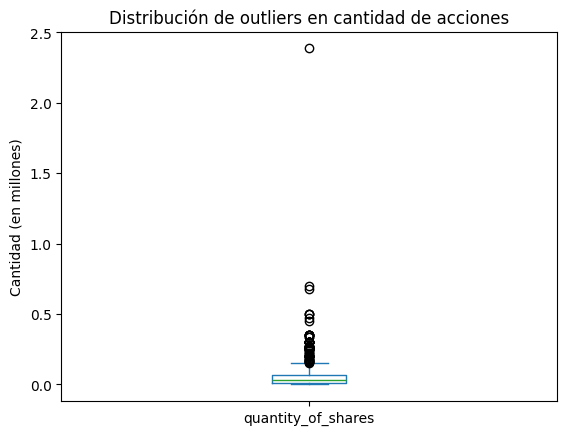

In [33]:
# boxplot de quantity_of_shares

(raw_insiders_AAPL['quantity_of_shares'] / 1e6).plot(
    kind='box',
    title='Distribución de outliers en cantidad de acciones',
    ylabel='Cantidad (en millones)'
    
)

plt.show()

# COMENTARIO
La mayoría de transacciones se concentra entre los 10K a 300K de acciones negociadas.

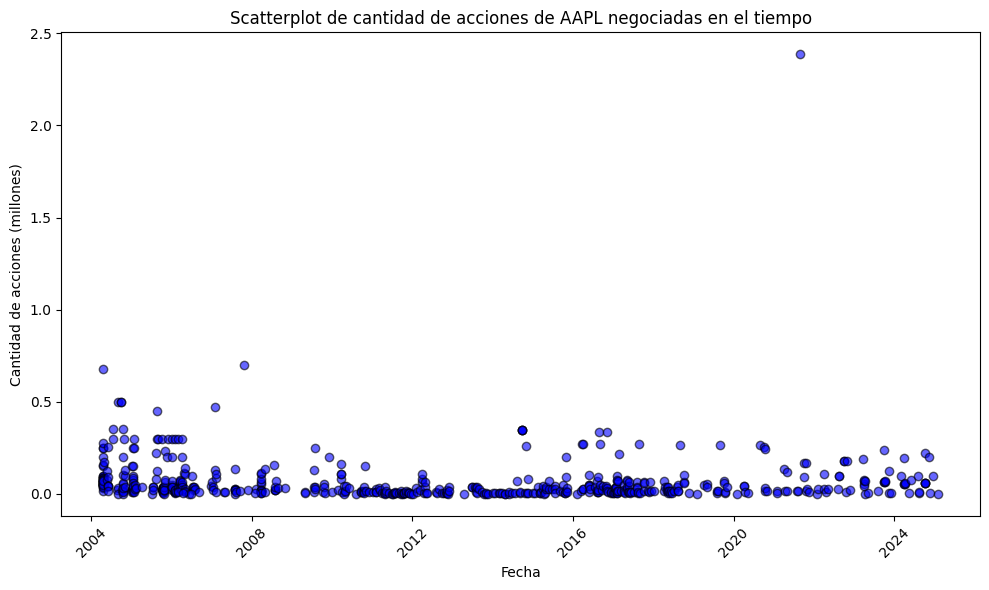

In [34]:
# scatterplot de quantity_of_shares

plt.figure(figsize=(10, 6))
plt.scatter(
    raw_insiders_AAPL['trade_date'],
    raw_insiders_AAPL['quantity_of_shares'] / 1e6,
    alpha=0.6,
    c='blue',
    edgecolor='k'
)
plt.title('Scatterplot de cantidad de acciones de AAPL negociadas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de acciones (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

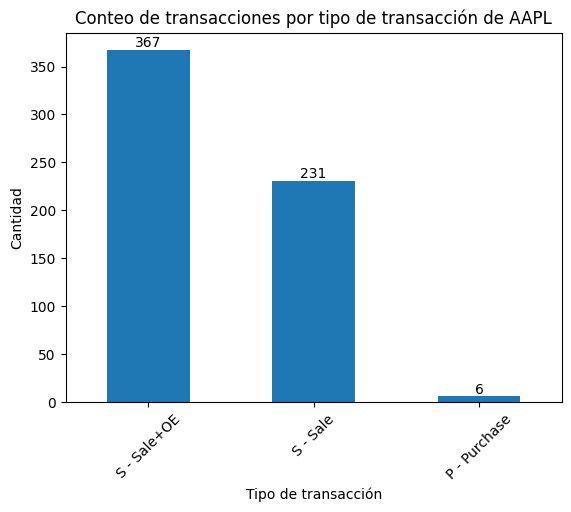

In [35]:
# graficos básicos
ax = raw_insiders_AAPL['trade_type'].value_counts().plot(
    kind='bar',
    title='Conteo de transacciones por tipo de transacción de AAPL',
    xlabel='Tipo de transacción',
    ylabel='Cantidad'
)
plt.xticks(rotation=45)

# Agregar etiquetas encima de las barras
ax.bar_label(ax.containers[0])

plt.show()


# COMENTARIO
Existen más transacciones por Sale+OE que por Sale y apenas 6 compras de acciones. Las caídas de precio de la acción generalmente están asociadas a las ventas de acciones debido a la especulación o que el mercado ha entrado en pánico.

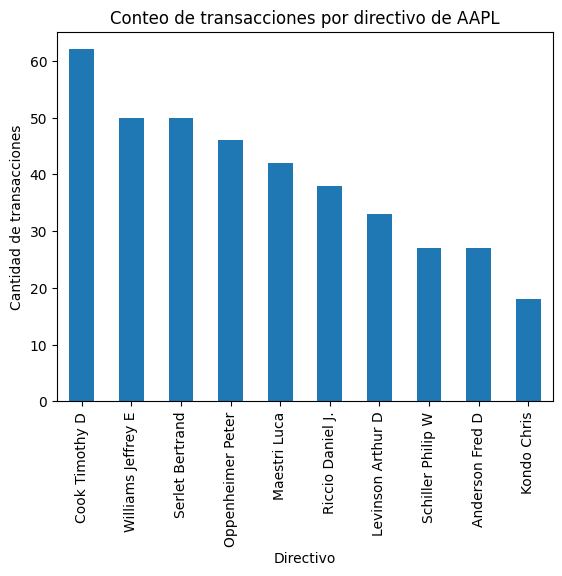

In [36]:
# histograma para saber cuales son los directivos ha realizado más transacciones (máximo 10 directivos)
ax = raw_insiders_AAPL['insider_name'].value_counts().head(10).plot(
    kind='bar',
    title='Conteo de transacciones por directivo de AAPL',
    xlabel='Directivo',
    ylabel='Cantidad de transacciones'
)

# COMENTARIO
En un gráfico que se ha extraído los 10 directivos que más han realizado transacciones de acciones se puede observar a Tim Cook, actual CEO.

C:\Users\santi\AppData\Local\Temp\ipykernel_25328\2730243544.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=raw_insiders_AAPL, x='trade_date', y=raw_insiders_AAPL['quantity_of_shares'] / 1e6, palette='Set2')


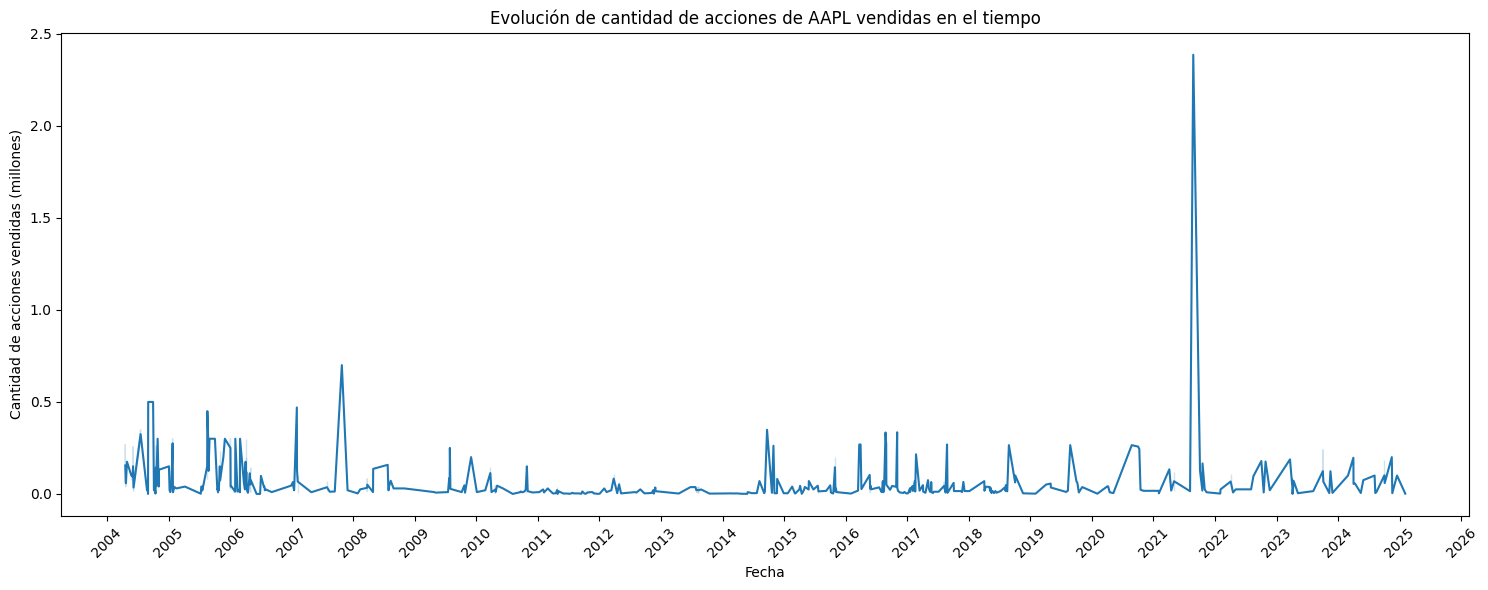

In [37]:
import matplotlib.dates as mdates

# evolución de cantidad de acciones vendidas en el tiempo usando seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=raw_insiders_AAPL, x='trade_date', y=raw_insiders_AAPL['quantity_of_shares'] / 1e6, palette='Set2')
plt.title('Evolución de cantidad de acciones de AAPL vendidas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de acciones vendidas (millones)')

# Ajustar los ticks del eje x para mostrar más años
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Mostrar cada año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato del año

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# COMENTARIO

En el 2021 hubo un pico de negociaciones de acciones, es justamente el valor máximo negociado. Como se observa en el gráfico, a lo largo de los años las transacciones se han mantenido entre un rango de 1K a 300K de acciones. 

In [38]:
raw_insiders_AAPL

,x,filing_date,trade_date,ticker,insider_name,title,trade_type,price,quantity_of_shares,owned,delta_owned,value,1d,1w,1m,6m
0,D,2004-04-21 19:07:40,2004-04-19,AAPL,Heinen Nancy R,SVP,S - Sale+OE,28.00,200000,1315,-99%,5600000,0.0,-3.0,-5.0,71.0
1,D,2004-04-21 19:08:35,2004-04-19,AAPL,Tamaddon Sina,SVP,S - Sale+OE,28.08,678400,6452,-99%,19046284,0.0,-3.0,-5.0,71.0
2,DM,2004-04-21 19:09:19,2004-04-19,AAPL,Rubinstein Jonathan,SVP,S - Sale+OE,28.35,250000,9906,-96%,7087500,0.0,-3.0,-5.0,71.0
3,D,2004-04-21 19:11:31,2004-04-19,AAPL,Cook Timothy D,EVP,S - Sale+OE,27.99,84000,4722,-95%,2351280,0.0,-3.0,-5.0,71.0
4,D,2004-04-21 19:12:19,2004-04-19,AAPL,Cook Timothy D,EVP,S - Sale+OE,28.21,94000,4722,-95%,2651880,0.0,-3.0,-5.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,NaN,2024-10-08 18:30:13,2024-10-04,AAPL,Maestri Luca,"SVP, CFO",S - Sale,226.52,59305,107788,-35%,13433769,NaN,NaN,NaN,NaN
600,NaN,2024-11-19 18:30:49,2024-11-18,AAPL,Kondo Chris,Principal Accounting Officer,S - Sale,228.87,4130,15419,-21%,945233,NaN,NaN,NaN,NaN
601,M,2024-11-19 18:31:42,2024-11-15,AAPL,Levinson Arthur D,Dir,S - Sale,227.32,200000,4215576,-5%,45464500,NaN,NaN,NaN,NaN
602,NaN,2024-12-18 18:30:20,2024-12-16,AAPL,Williams Jeffrey E,COO,S - Sale,249.97,100000,389944,-20%,24997395,NaN,NaN,NaN,NaN


In [39]:
# tomar el dataframe limpio y guardarlo como un nuevo csv
raw_insiders_AAPL.to_csv(('../Dataset/curated/AAPL_transaccionesOPENINSIDER_limpio.csv'))

Aquí concluye el EDA, exportamos los datos para posteriormente empezar con data_wrangling.